Insercion with Y axis (n): 0.00
pendiente (m): 2.10
suma de cuadrados de los residuos (RSS): 31.421250


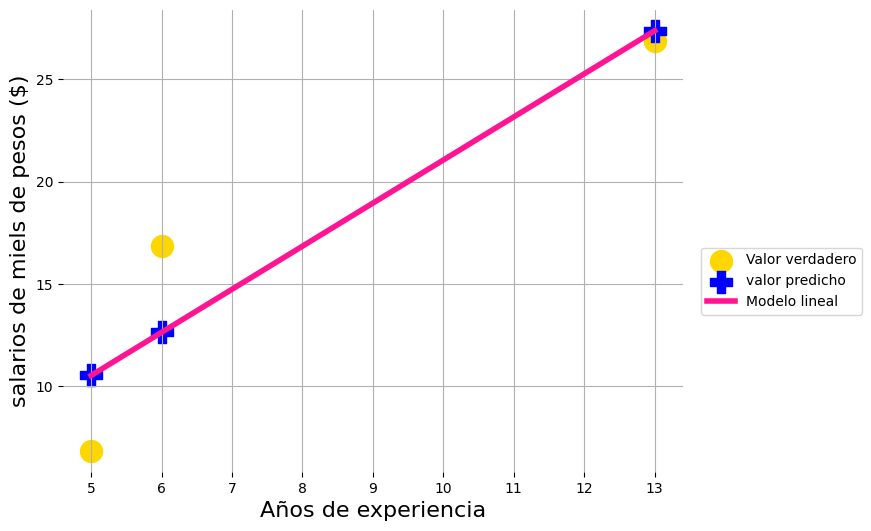

In [2]:
#linear regresion with descendant gradiant
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

#independent variable
experience = np.array([[5],[6],[13]])

#objective variable
salary = np.array([6.85, 16.83, 26.84])

#Linear model created with minimun quadratic methods
myModel = LinearRegression().fit(experience.reshape(3,-1),salary)

#previzualization
print("Insercion with Y axis (n): %0.2f"%myModel.intercept_)
print("pendiente (m): %0.2f"%myModel.coef_[0])
print("suma de cuadrados de los residuos (RSS): %0-2f"%((salary-myModel.predict(experience))**2).sum())

plt.figure(figsize=(8,6))

plt.scatter(experience, salary, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experience, myModel.predict(experience),
             color="blue", s=250, marker="P", label="valor predicho")

plt.plot(experience, myModel.predict(experience),
          linewidth=4, color="deeppink", label="Modelo lineal")
experience = experience.reshape(3)

plt.ylabel("salarios de miels de pesos ($)", size=16)
plt.xlabel("Años de experiencia", size = 16)
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.grid()
plt.box(False)
plt.show()



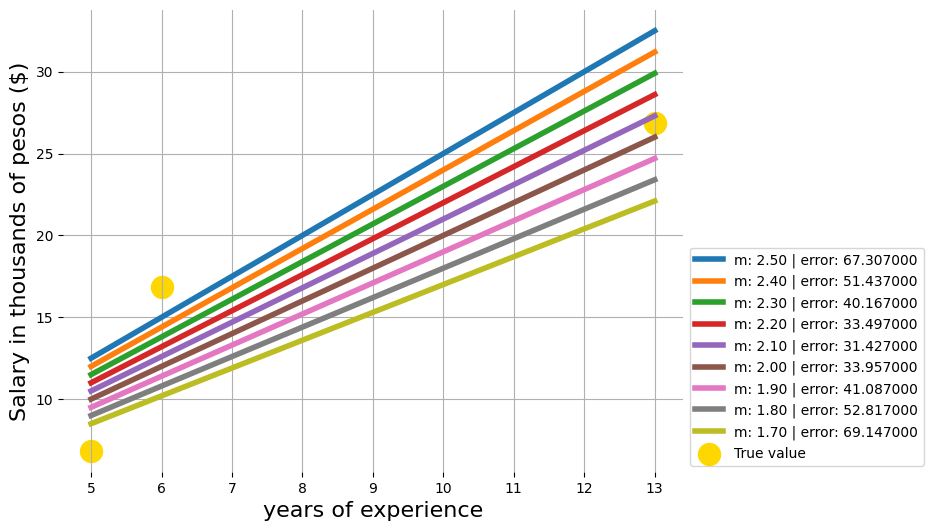

In [3]:
#creation of multiple slope for exploration

slopes = np.arange(2.5,1.6, -0.1)

#vector to save error from different models
errors =  np.array([])

#visuaization of models
plt.figure(figsize=(8,6))

for slope in slopes:
  #error of model (summ of quadratic residues)
  error = ((slope*experience-salary)**2).sum()

  #vies of a model for a given slope
  plt.plot(experience, slope*experience, linewidth=4,
           label = "m: %0.2f | error: %0-2f"%
            (slope, error))

  errors = np.append(errors,error)

plt.scatter(experience,salary, color="gold", s=250,
            marker="o", label="True value")

plt.ylabel("Salary in thousands of pesos ($)", size=16)
plt.xlabel("years of experience", size = 16)
plt.legend(bbox_to_anchor=(1,0.5))
plt.grid()
plt.box(False)
plt.show()

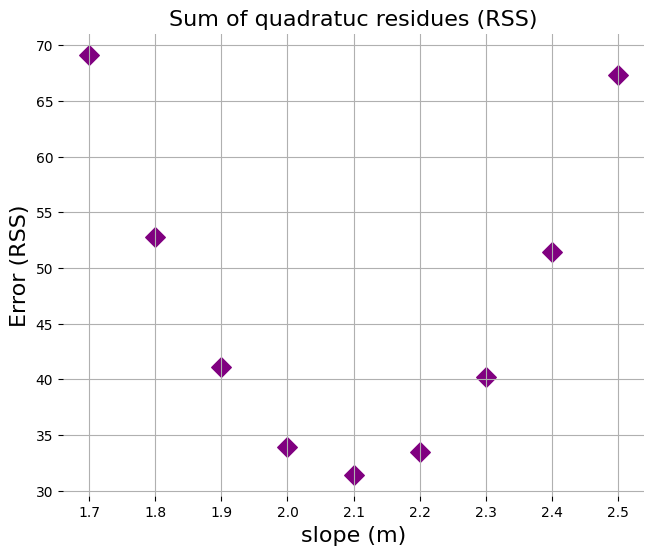

In [4]:
#previzualization of errors

plt.figure(figsize=(7.5,6))
plt.title("Sum of quadratuc residues (RSS)", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("slope (m)", size=16)
plt.scatter(slopes, errors, color="purple", marker="D", s=99)
plt.grid()
plt.box(False)
plt.show()

In [7]:
#fromule to minimize error
#persone 1: (6.85, 5) persona 2: (16.83,6) persona3: (26.84, 13)
#error function
m = sym.Symbol("m")

error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 -  m*13)**2
derivate = sym.diff(error, m)

for slope in slopes:
  print(derivate,"Derivated %0.2f"% derivate.evalf(subs={m: slope}))

460.0*m - 968.3 Derivated 181.70
460.0*m - 968.3 Derivated 135.70
460.0*m - 968.3 Derivated 89.70
460.0*m - 968.3 Derivated 43.70
460.0*m - 968.3 Derivated -2.30
460.0*m - 968.3 Derivated -48.30
460.0*m - 968.3 Derivated -94.30
460.0*m - 968.3 Derivated -140.30
460.0*m - 968.3 Derivated -186.30


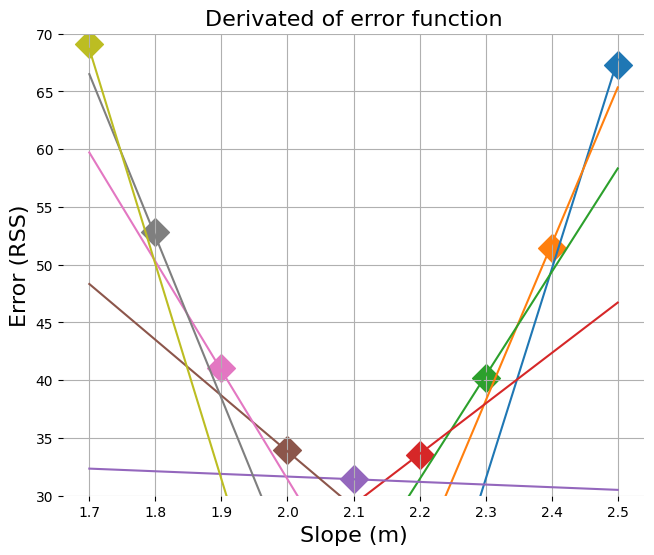

In [17]:
#Visualization of derivated of errorfunction

plt.figure(figsize=(7.5,6))

for i in range(0,len(errors), 1):
  plt.scatter(slopes[i], errors[i],
              label="%0.2f" % derivate.evalf(subs={m: slopes[i]}),
              marker="D", s=200)

  #valuation of derivated for a givien error
  slope = derivate.evalf(subs={m: slopes[i]})
  plt.plot(np.array([1.7, 2.5]),
          np.array([1.7, 2.5])*slope +
          slope*(-2.3 + i * 0.05) + errors.min())

plt.title("Derivated of error function", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Slope (m)", size=16)
plt.ylim(30,70)
plt.grid()
plt.box(False)
plt.show()

Insercion with Y axis (n): -4.38
pendiente (m): 2.45
suma de cuadrados de los residuos (RSS): 4.028744


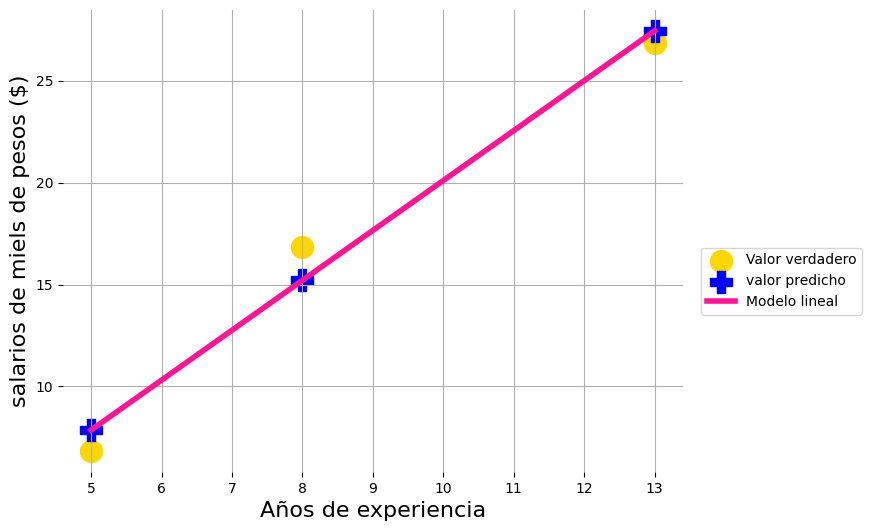

In [20]:
#Generalization of data for two oe more parameters m and B supposing that we are working with a linear regression algorithm
#almost equal data, but with a change in workers experience
#independient variable

experience = np.array ([[5],[8],[13]])

#objective variable
salary = np.array([6.85, 16.83, 26.84])

#linear morel created with method  of quadratic minimuns
myModel = LinearRegression().fit(experience.reshape(3, -1), salary)


#previzualization
print("Insercion with Y axis (n): %0.2f"%myModel.intercept_)
print("pendiente (m): %0.2f"%myModel.coef_[0])
print("suma de cuadrados de los residuos (RSS): %0-2f"%((salary-myModel.predict(experience))**2).sum())

plt.figure(figsize=(8,6))

plt.scatter(experience, salary, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experience, myModel.predict(experience),
             color="blue", s=250, marker="P", label="valor predicho")

plt.plot(experience, myModel.predict(experience),
          linewidth=4, color="deeppink", label="Modelo lineal")
experience = experience.reshape(3)

plt.ylabel("salarios de miels de pesos ($)", size=16)
plt.xlabel("Años de experiencia", size = 16)
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.grid()
plt.box(False)
plt.show()


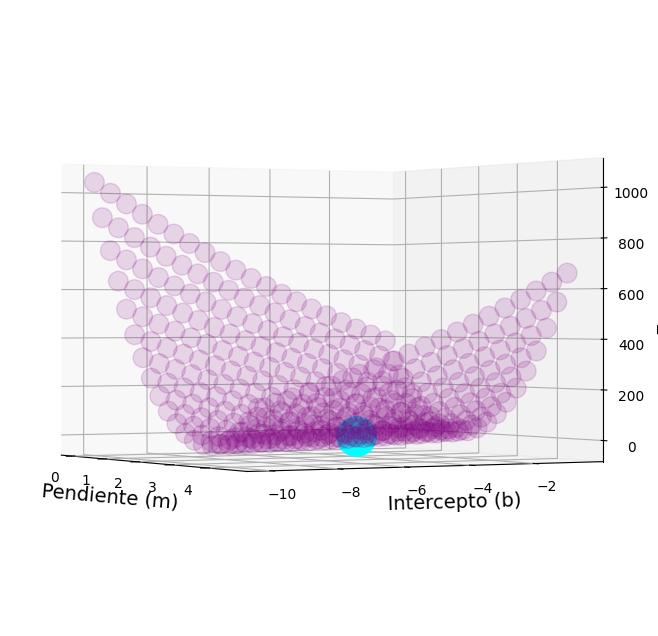

In [35]:
#function of calculation of error, but this time It handles with two parameters m and b

def error_RRS(m,b):
  return (6.85- (m*5+b))**2 + (16.83 - (m*8+b))**2 + (26.84 - (m*13+b))

#generation of the
points = np.zeros(shape=(400,3))
i = 0

for pendiente in np.arange(0,5,0.25):
  for intercepto in np.arange(-10,0,0.50):
    points[i][0] = pendiente
    points[i][1] = intercepto
    points[i][2] = error_RRS(pendiente, intercepto)
    i+=1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

#minimum global
ax.scatter (2.45, -4.38, 4.03,
            marker="o", c="cyan", s=800)
#all other points
ax.scatter (points.T[0], points.T[1], points.T[2],
            marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel("Pendiente (m)", size=14)
ax.set_ylabel("Intercepto (b)", size=14)
ax.set_zlabel("Error", size=14)
ax.view_init(0,-30)#gradiant representation

plt.show()

In [27]:
 #partial derivates of error function
 m, b = sym.symbols ("m b")
 error =  (6.85- (m*5+b))**2 + (16.83 - (m*8+b))**2 + (26.84 - (m*13+b))**2

 error_derivated_m = sym.diff(error,m)
 error_derivated_b = sym.diff(error,b)

print("Derivated of m error: ", error_derivated_m)
print("Derivated of b error: ",error_derivated_b)


Derivated of m error:  52.0*b + 516.0*m - 1035.62
Derivated of b error:  6.0*b + 52.0*m - 101.04


In [34]:
#Implementation of descendent gradiant
max_iterations = 10000
learning_pace = 0.001

#initialization of random of slape and intercepto
slape = 0
intercepto = -10

errors = np.zeros(shape=(10000, 3))

for i in range(max_iterations):
  #calculate of gradient
  gradiants = [error_derivated_m.evalf(subs={m: slape,
                                           b: intercepto}),
              error_derivated_b.evalf(subs={m: slape,
                                           b: intercepto})
              ]

  #parameters updates
  slape = slape - learning_pace*gradiants[0]
  intercepto = intercepto - learning_pace*gradiants[1]

  #errors recording
  errors[i][0] = slape
  errors[i][1] = intercepto
  errors[i][2] = error_RRS(slape, intercepto)


#calculated values by minimun quadratoc methos of sklearn
#slape (m): 2.44899163
#Intercepto (n): -4.382390816326527
print("Derivate of slape (m) = ", gradiants[0])
print("Derivate of intercepto (b) = ", gradiants[1])
print("m = ", slape,"\nb = ", intercepto)



Derivate of slape (m) =  0.000218445852030267
Derivate of intercepto (b) =  -0.00216449575579388
m =  2.44835147659091 
b =  -4.37940660844884


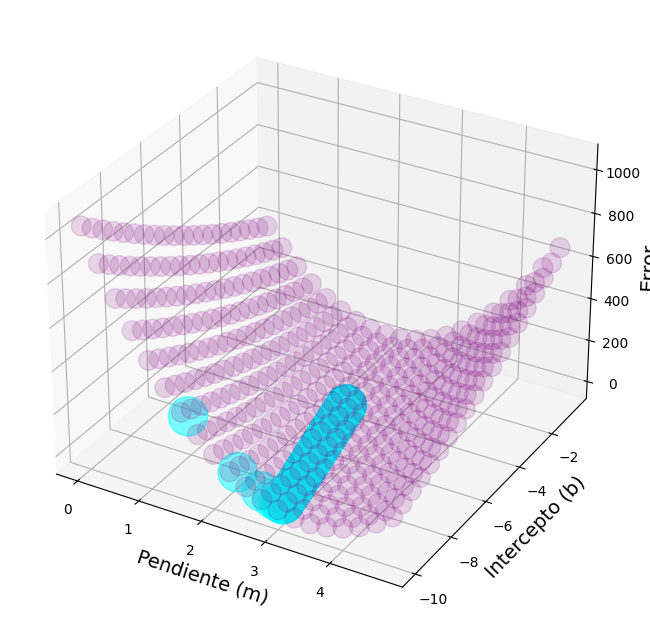

In [41]:
#vizualization of descece of error
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

#way of dicrecence of oerror
ax.scatter(errors.T[0], errors.T[1], errors.T[2],
                                marker="o", c="cyan", s=800, alpha=0.5)

#all other points
ax.scatter(points.T[0], points.T[1], points.T[2],
          marker="o", c="purple", s=200, alpha=0.15)


ax.set_xlabel("Pendiente (m)", size=14)
ax.set_ylabel("Intercepto (b)", size=14)
ax.set_zlabel("Error", size=14)
#ax.view_init(0,-30)#gradiant representation

plt.show()